In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )

In [43]:
# List of non-sprint events in the 2024 F1 calendar
non_sprint_events = [
    'Bahrain Grand Prix',
    'Saudi Arabian Grand Prix',
    'Australian Grand Prix',
    'Japanese Grand Prix',
    'Emilia Romagna Grand Prix',
    'Canadian Grand Prix',
    'Spanish Grand Prix',
    'British Grand Prix',
    'Hungarian Grand Prix',
    'Belgian Grand Prix',
    'Dutch Grand Prix',
    'Italian Grand Prix',
    'Singapore Grand Prix',
    'Mexican Grand Prix',
    'Las Vegas Grand Prix',
    'Abu Dhabi Grand Prix'
]

transformed_laps_dataframes = {}


for event in non_sprint_events:
    try:
        # Load the FP2 session
        session = fastf1.get_session(2024, event, 'FP2')
        session.load()
        
        # Filter out box laps and keep only accurate laps
        laps = session.laps.pick_wo_box()
        laps = laps[laps['IsAccurate'] == True]
        
        # Transform laps: add a new column for lap times in seconds
        transformed_laps = laps.copy()
        transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()
        
        # Store the transformed dataframe in the dictionary
        transformed_laps_dataframes[event] = transformed_laps
        print(f"Transformed laps for {event} FP2 loaded successfully.")
    except Exception as e:
        print(f"Failed to load data for {event}: {e}")

core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Usi

Transformed laps for Bahrain Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 38
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 38)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 21 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '38', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_dat

Transformed laps for Saudi Arabian Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Japanese Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core  

Transformed laps for Australian Grand Prix FP2 loaded successfully.


core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 1)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 10)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 11)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 14)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 2)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 63)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers:

Transformed laps for Japanese Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Canadian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Emilia Romagna Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Canadian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for British Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Spanish Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for British Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Belgian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Hungarian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Dutch Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Belgian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Dutch Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Singapore Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Italian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
events      WARNING 	Correcting user input 'Mexican Grand Prix' to 'Mexico City Grand Prix'
core           INFO 	Loading data for Mexico City Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Singapore Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Las Vegas Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
cor

Transformed laps for Mexican Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Las Vegas Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '4', '43', '44', '55', '61', '63', '77', '81']


Transformed laps for Abu Dhabi Grand Prix FP2 loaded successfully.


In [3]:
def label_race_pace(dataframe, driver, min_time, max_time):
    # Filter for the driver's laps
    driver_data = dataframe.pick_drivers(driver)[['LapTime (s)']].copy()  # Keep only lap times
    if driver_data.empty:
        print(f"No data for driver: {driver}")
        return None

    # **1. Remove the Fastest and Slowest Laps**
    n_to_remove = 1  # Number of fastest and slowest laps to remove
    driver_data = driver_data.sort_values('LapTime (s)').iloc[n_to_remove:-n_to_remove]

    # Reset the index after filtering
    driver_data = driver_data.reset_index(drop=True)

    # **2. Assign is_race_pace Based on Range**
    driver_data['is_race_pace'] = 0  # Default to 0
    driver_data.loc[
        (driver_data['LapTime (s)'] >= min_time) & 
        (driver_data['LapTime (s)'] <= max_time), 
        'is_race_pace'
    ] = 1

    # **3. Calculate LapTimeDifference**
    driver_data['LapTimeDifference'] = driver_data['LapTime (s)'].diff(periods = -1 ).abs()

    driver_data = driver_data.dropna(subset=['LapTimeDifference']).reset_index(drop=True)

    # **4. Add Consistency Feature with Non-Overlapping Rolling**
    window_size = 5  # Non-overlapping group size
    max_diff = 3   # Maximum allowed difference for consistency

    # Assign groups for non-overlapping rolling
    driver_data['Group'] = (driver_data.index // window_size)

    # Calculate max, min, and range for each group
    grouped = driver_data.groupby('Group')['LapTime (s)'].agg(['max', 'min']).reset_index()
    grouped['RollingRange'] = grouped['max'] - grouped['min']

    # Map RollingRange back to the original dataframe
    driver_data = driver_data.merge(grouped[['Group', 'RollingRange']], on='Group', how='left')

    # Add a Consistency flag (1 if within range, 0 otherwise)
    driver_data['Consistency'] = (driver_data['RollingRange'] <= max_diff).astype(int)

    # Drop intermediate columns to keep the dataframe clean
    driver_data.drop(columns=['Group', 'RollingRange'], inplace=True)

    return driver_data

# Bahrain
bahrain_pia = label_race_pace(transformed_laps_dataframes[non_sprint_events[0]], 'PIA', 95, 98).reset_index()
bahrain_oco = label_race_pace(transformed_laps_dataframes[non_sprint_events[0]], 'OCO', 97, 100).reset_index()
bahrain_bot = label_race_pace(transformed_laps_dataframes[non_sprint_events[0]], 'BOT', 97, 99).reset_index()
bahrain_ver = label_race_pace(transformed_laps_dataframes[non_sprint_events[0]], 'VER', 96, 98).reset_index()

# Saudi Arabian
saudi_lec = label_race_pace(transformed_laps_dataframes[non_sprint_events[1]], 'LEC', 93, 96).reset_index()
saudi_hul = label_race_pace(transformed_laps_dataframes[non_sprint_events[1]], 'HUL', 94.5, 96.5).reset_index()
saudi_alb = label_race_pace(transformed_laps_dataframes[non_sprint_events[1]], 'ALB', 94, 96).reset_index()


# Australia
australia_nor = label_race_pace(transformed_laps_dataframes[non_sprint_events[2]], 'NOR', 82.5, 84).reset_index()
australia_lec = label_race_pace(transformed_laps_dataframes[non_sprint_events[2]], 'LEC', 82, 84).reset_index()
australia_str = label_race_pace(transformed_laps_dataframes[non_sprint_events[2]], 'STR', 82, 84).reset_index()
australia_rus = label_race_pace(transformed_laps_dataframes[non_sprint_events[2]], 'RUS', 83, 85).reset_index()


# Imola
imola_mag = label_race_pace(transformed_laps_dataframes[non_sprint_events[4]], 'MAG', 81, 83).reset_index()
imola_alo = label_race_pace(transformed_laps_dataframes[non_sprint_events[4]], 'ALO', 81, 83).reset_index()
imola_zho = label_race_pace(transformed_laps_dataframes[non_sprint_events[4]], 'ZHO', 81, 83).reset_index()

#Spain

spain_ver = label_race_pace(transformed_laps_dataframes[non_sprint_events[4]], 'VER', 79, 82).reset_index()
spain_nor = label_race_pace(transformed_laps_dataframes[non_sprint_events[4]], 'NOR', 78, 81.5).reset_index()
spain_ham = label_race_pace(transformed_laps_dataframes[non_sprint_events[4]], 'HAM', 79, 82).reset_index()

#Belgium

belg_lec = label_race_pace(transformed_laps_dataframes[non_sprint_events[9]], 'LEC', 109, 112).reset_index()
belg_alb = label_race_pace(transformed_laps_dataframes[non_sprint_events[9]], 'ALB', 108, 111).reset_index()
belg_bot = label_race_pace(transformed_laps_dataframes[non_sprint_events[9]], 'BOT', 109, 112).reset_index()

# Step 2: Combine all labeled data
all_training_data = pd.concat([
    bahrain_pia, bahrain_oco, bahrain_bot, bahrain_ver,
    saudi_lec, saudi_hul, saudi_alb,
    australia_nor, australia_lec, australia_str, australia_rus,
    imola_mag, imola_alo, imola_zho, spain_ver, spain_nor, spain_ham,
    belg_alb, belg_alb, bahrain_bot
], ignore_index=True)

In [5]:
# Standardize features
scaler = StandardScaler()
features = all_training_data[['LapTime (s)', 'LapTimeDifference', 'Consistency']]
features_standardized = scaler.fit_transform(features)
labels = all_training_data['is_race_pace']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_standardized, labels, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.92      1.00      0.96        36

    accuracy                           0.95        60
   macro avg       0.96      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60



In [6]:
# Save the model and scaler
joblib.dump(model, 'standardized_race_pace_model.pkl')
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [7]:
model_test = joblib.load('standardized_race_pace_model.pkl')

In [8]:
def add_consistency_feature(dataframe, window_size, max_diff, n_to_remove=2):
    """
    Adds a Consistency feature to the dataframe.
    Consistency indicates whether laps within the grouped rolling window differ by less than max_diff seconds.
    The dataframe is sorted by LapTime (s) to remove fastest/slowest laps, 
    but it is then restored to the original lap order using the 'LapNumber' column.
    """
    # **1. Remove the Fastest and Slowest Laps**
    # Sort by LapTime to identify the fastest and slowest laps
    dataframe = dataframe.sort_values('LapTime (s)')

    # Remove the fastest and slowest laps
    dataframe = dataframe.iloc[n_to_remove:-n_to_remove].copy()

    # **2. Restore the Original Lap Order**
    dataframe = dataframe.sort_values('LapNumber').reset_index(drop=True)

    # **3. Calculate LapTimeDifference**
    # Ensure the difference is calculated between consecutive laps in original order
    dataframe['LapTimeDifference'] = dataframe['LapTime (s)'].diff(periods = -1).abs()

    # Drop the row where LapTimeDifference is NaN (last row)
    dataframe = dataframe.dropna(subset=['LapTimeDifference']).reset_index(drop=True)

    # **4. Assign Non-Overlapping Groups for Rolling**
    dataframe['Group'] = (dataframe.index // window_size)

    # **5. Calculate max, min, and range for each group**
    grouped = dataframe.groupby('Group')['LapTime (s)'].agg(['max', 'min']).reset_index()
    grouped['RollingRange'] = grouped['max'] - grouped['min']

    # **6. Map RollingRange back to the original dataframe**
    dataframe = dataframe.merge(grouped[['Group', 'RollingRange']], on='Group', how='left')

    # **7. Add a Consistency flag (1 if within range, 0 otherwise)**
    dataframe['Consistency'] = (dataframe['RollingRange'] <= max_diff).astype(int)

    # **8. Drop intermediate columns to keep the dataframe clean**
    dataframe.drop(columns=['Group', 'RollingRange'], inplace=True)

    return dataframe

In [9]:
# Generalized approach for all drivers in an event
def get_race_pace_laps(event_data, scaler, model, window_size, max_diff, n_to_remove, lap_time_tolerance=2.0):
    """
    Identify race pace laps for all drivers in a given event.
    """
    # Get the unique drivers in the event
    drivers_event = event_data['Driver'].unique()

    # Initialize an empty list to store race pace laps for all drivers
    race_pace_laps_all_drivers = []

    # Loop through each driver
    for driver in drivers_event:
        # Filter the laps for the current driver
        driver_data = event_data.pick_drivers(driver).copy()

        # Exclude laps with inaccurate data or pit box laps
        driver_data = driver_data.pick_wo_box()
        driver_data = driver_data[driver_data['IsAccurate'] == True]

         # Check if there are any laps left for the driver after filtering
        if driver_data.empty:
            print(f"No valid laps for driver {driver}. Skipping.")
            continue
        
        # Add consistency feature
        driver_data = add_consistency_feature(driver_data, window_size=window_size, max_diff=max_diff, n_to_remove=n_to_remove)

        # Select the features needed for prediction
        unknown_features = driver_data[['LapTime (s)', 'LapTimeDifference', 'Consistency']]

        # Check if unknown_features has any rows (avoid empty input to the scaler)
        if unknown_features.empty:
            print(f"No valid features for driver {driver}. Skipping.")
            continue

        # Standardize the features
        unknown_features_standardized = scaler.transform(unknown_features)

        # Predict race pace laps
        driver_data['is_race_pace'] = model_test.predict(unknown_features_standardized)

        # Filter only race pace laps for this driver
        race_pace_driver = driver_data[driver_data['is_race_pace'] == 1]

        # Compute the median lap time for race pace laps
        median_lap_time = race_pace_driver['LapTime (s)'].median()
        
        # Define the range for valid laps
        lower_bound = median_lap_time - lap_time_tolerance
        upper_bound = median_lap_time + lap_time_tolerance

        # Keep only race pace laps within the median tolerance
        race_pace_driver = race_pace_driver[
            (race_pace_driver['LapTime (s)'] >= lower_bound) &
            (race_pace_driver['LapTime (s)'] <= upper_bound)
        ]

        # Add the race pace laps to the list
        race_pace_laps_all_drivers.append(race_pace_driver)

    # Combine all race pace laps into a single DataFrame
    race_pace_laps_all_drivers_df = pd.concat(race_pace_laps_all_drivers, ignore_index=True)

    return race_pace_laps_all_drivers_df

In [46]:
# Example: Apply to a specific event
event = transformed_laps_dataframes[non_sprint_events[15]]

# Call the function to get all race pace laps for the event
all_race_pace_laps = get_race_pace_laps(event, scaler, model_test, window_size=3, max_diff=3, n_to_remove=2)

In [47]:
# order the team from the fastest (lowest median lap time) to slower
team_order = (
    all_race_pace_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


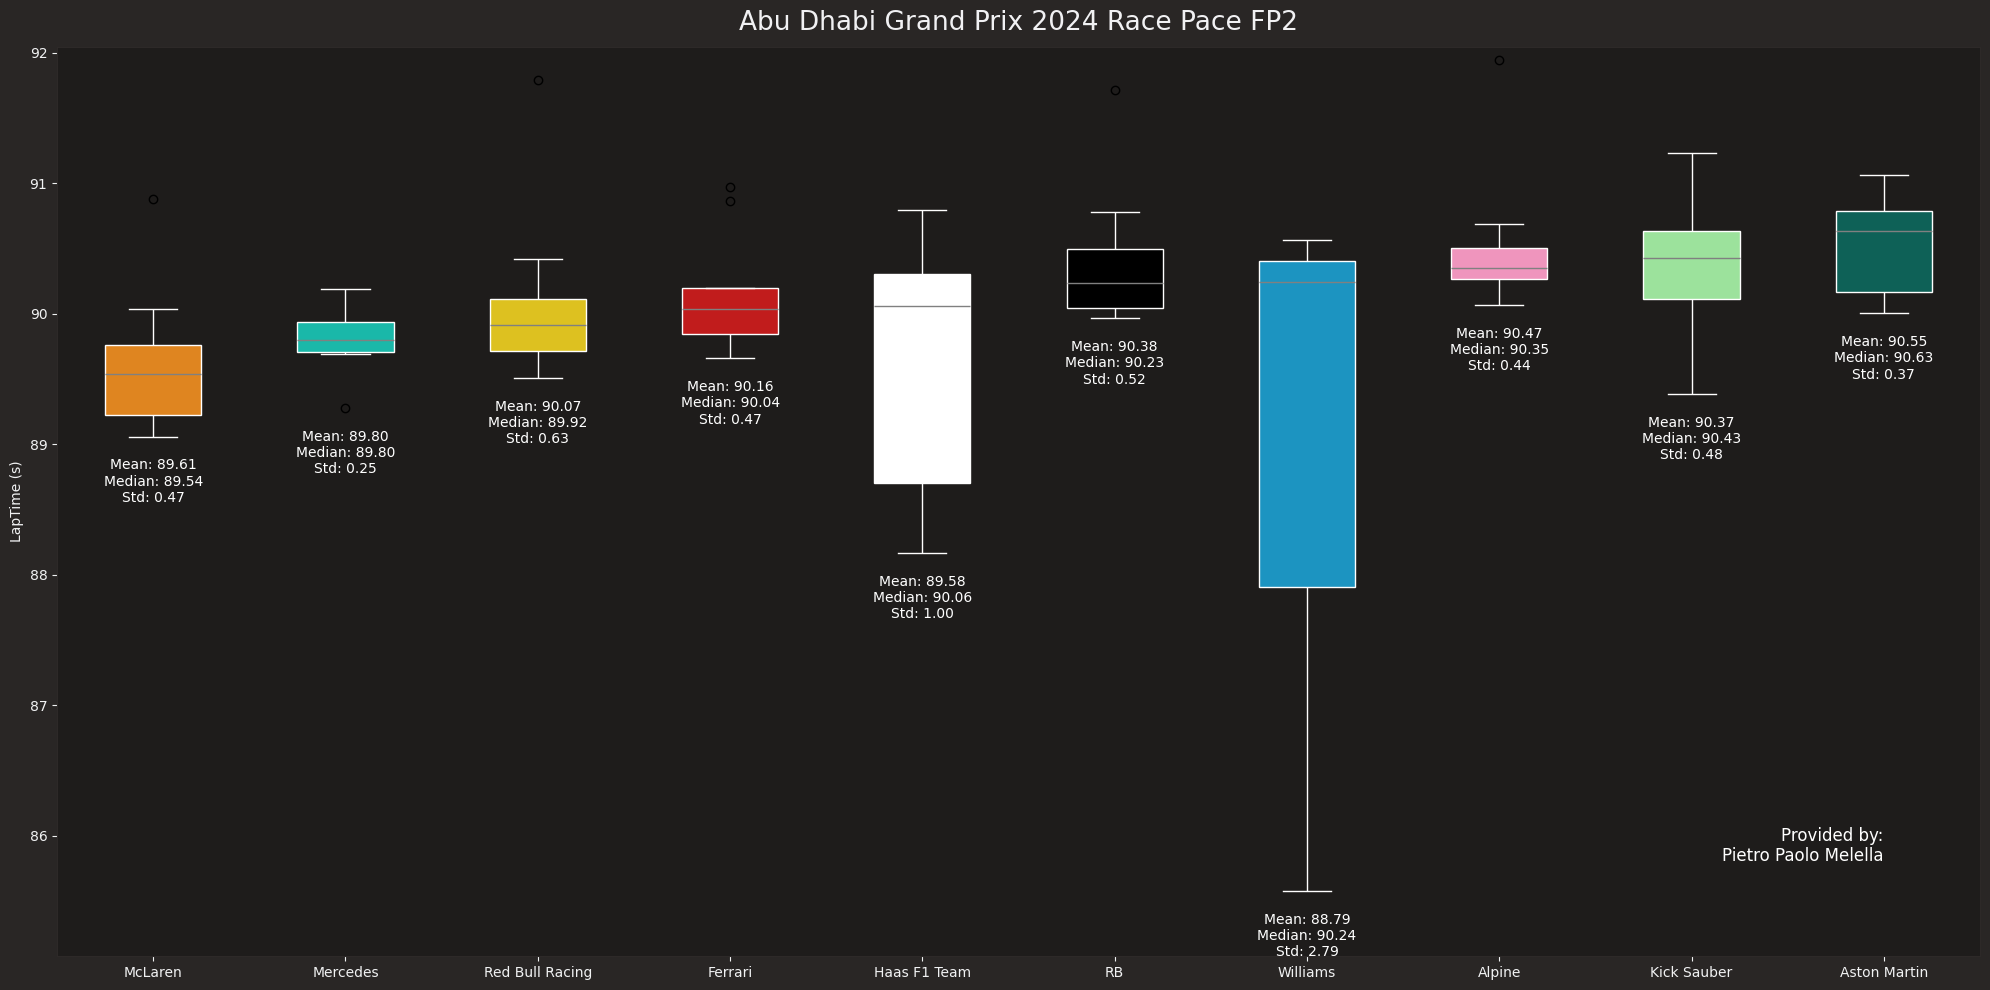

In [48]:
# First, calculate the mean and median times for each team
all_race_pace_laps.reset_index(drop=True, inplace=True)

team_stats = all_race_pace_laps.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

team_order = team_stats['median'].sort_values().index

# Create the boxplot
fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
box_plot = sns.boxplot(
    data=all_race_pace_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Loop through the teams and add mean, median, and std text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker
    
    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']
    std_time = all_race_pace_laps[all_race_pace_laps['Team'] == team]['LapTime (s)'].std()  # Calculate std
    
    # Place the text below the whisker (min value in this case)
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}\nStd: {std_time:.2f}', 
        horizontalalignment='center', color='white', fontsize=10
    )

# Add the title and grid properties
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace FP2")
plt.grid(visible=False)

# Add credit text
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Remove the x-label
ax.set(xlabel=None)
# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(team_stats['min'].min()-0.5, team_stats['mean'].max()+1.5)  # Example range, adjust based on your data

plt.tight_layout()
plt.show()

In [59]:
all_race_pace_laps.pick_drivers('COL')

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s),LapTimeDifference,Consistency,is_race_pace
76,0 days 00:16:27.071000,COL,43,0 days 00:01:25.576000,2.0,1.0,NaT,NaT,0 days 00:00:17.621000,0 days 00:00:36.712000,...,12,NaN,False,,False,True,85.576,9.586,1,1
